11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.6825 - loss: 1.0198 - val_accuracy: 0.9394 - val_loss: 0.2168
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.9252 - loss: 0.2577 - val_accuracy: 0.9523 - val_loss: 0.1598
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9408 - loss: 0.1926 - val_accuracy: 0.9587 - val_loss: 0.1325
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9487 - loss: 0.1648 - val_accuracy: 0.9639 - val_loss: 0.1164
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9521 - loss: 0.1491 - val_accuracy: 0.9663 - val_loss: 0.1081
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9576 - loss: 0.1369 - val_accuracy: 0.9682 - val_loss: 0.0994
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9605 - loss: 0.1264 - val_accuracy: 0.9700 - val_l

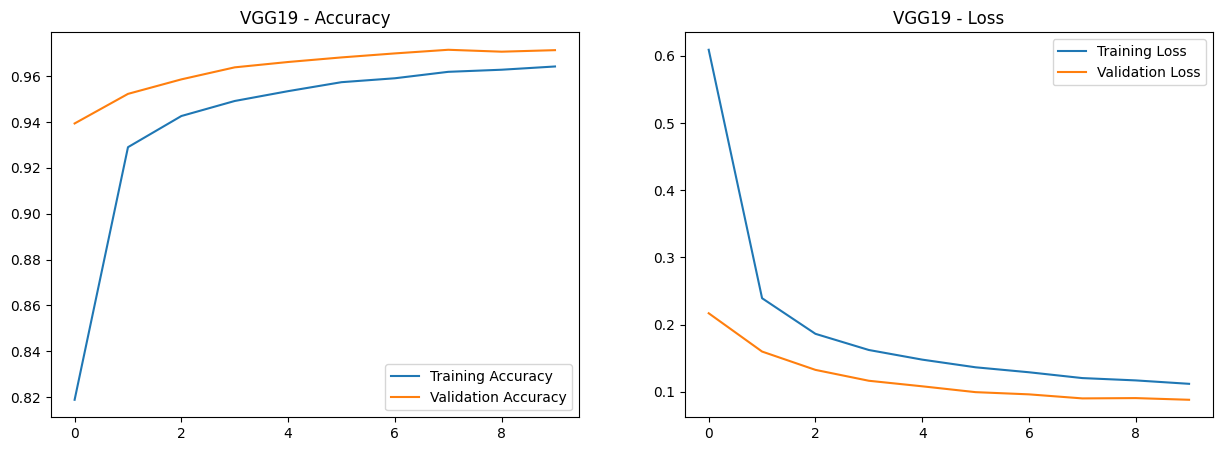

VGG19 Test Accuracy: 0.9714
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


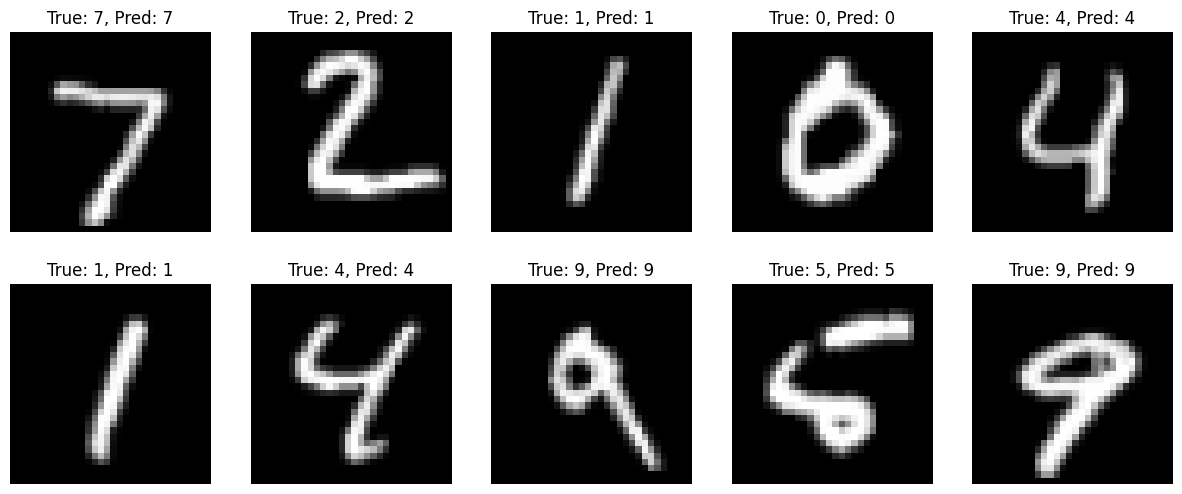

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.98      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.95      0.96       892
           6       0.96      0.99      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = tf.image.resize(train_images[..., tf.newaxis], [32, 32])
train_images = tf.image.grayscale_to_rgb(train_images)
train_images = train_images.numpy() / 255.0

test_images = tf.image.resize(test_images[..., tf.newaxis], [32, 32])
test_images = tf.image.grayscale_to_rgb(test_images)
test_images = test_images.numpy() / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

base_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

test_loss_vgg, test_acc_vgg = model.evaluate(test_images, test_labels)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG19 - Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Training Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.title('VGG19 - Loss')
plt.legend()
plt.show()

print(f"VGG19 Test Accuracy: {test_acc_vgg:.4f}")

predictions = model.predict(test_images[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels[:10], axis=1)

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i][:, :, 0], cmap='gray')
    plt.title(f'True: {true_classes[i]}, Pred: {predicted_classes[i]}')
    plt.axis('off')
plt.show()

from sklearn.metrics import classification_report
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
print(classification_report(y_true, y_pred_classes))